<h1>Book Contents</h1>
<li>Creation of 2D Integer-to-Integer 5/3 Lifting Wavelet transform</li>
<li>Perform Transform on a file (irrespective of format, HanQiu[2021] ) at level 2</li>

In [73]:
from PIL import Image
from IPython.display import display, HTML
def display_images_in_grid(ll, hl, lh, hh):
    
    display(HTML('<h2>LL</h2>'))
    display(Image.fromarray(ll))
    
    display(HTML('<h2>HL</h2>'))
    display(Image.fromarray(hl))

    display(HTML('<h2>LH</h2>'))
    display(Image.fromarray(lh))

    display(HTML('<h2>HH</h2>'))
    display(Image.fromarray(hh))

/tmp/ipykernel_33269/3832927745.py:12: RuntimeWarning: overflow encountered in scalar add
  seq[(i << 1) - 1] -= (seq[(i - 1) << 1] + seq[i << 1]) >> 1
/tmp/ipykernel_33269/3832927745.py:15: RuntimeWarning: overflow encountered in scalar add
  seq[0] += (seq[1] + seq[1] + 2) >> 2
/tmp/ipykernel_33269/3832927745.py:17: RuntimeWarning: overflow encountered in scalar add
  seq[i << 1] += (seq[(i << 1) - 1] + seq[(i << 1) + 1] + 2) >> 2
/tmp/ipykernel_33269/3832927745.py:18: RuntimeWarning: overflow encountered in scalar add
  seq[(approx_len - 1) << 1] += (seq[(approx_len << 1) - 3] + seq[(detail_len << 1) - 1] + 2) >> 2
/tmp/ipykernel_33269/3832927745.py:13: RuntimeWarning: overflow encountered in scalar add
  seq[(detail_len << 1) - 1] -= (seq[(detail_len - 1) << 1] + seq[(approx_len - 1) << 1]) >> 1


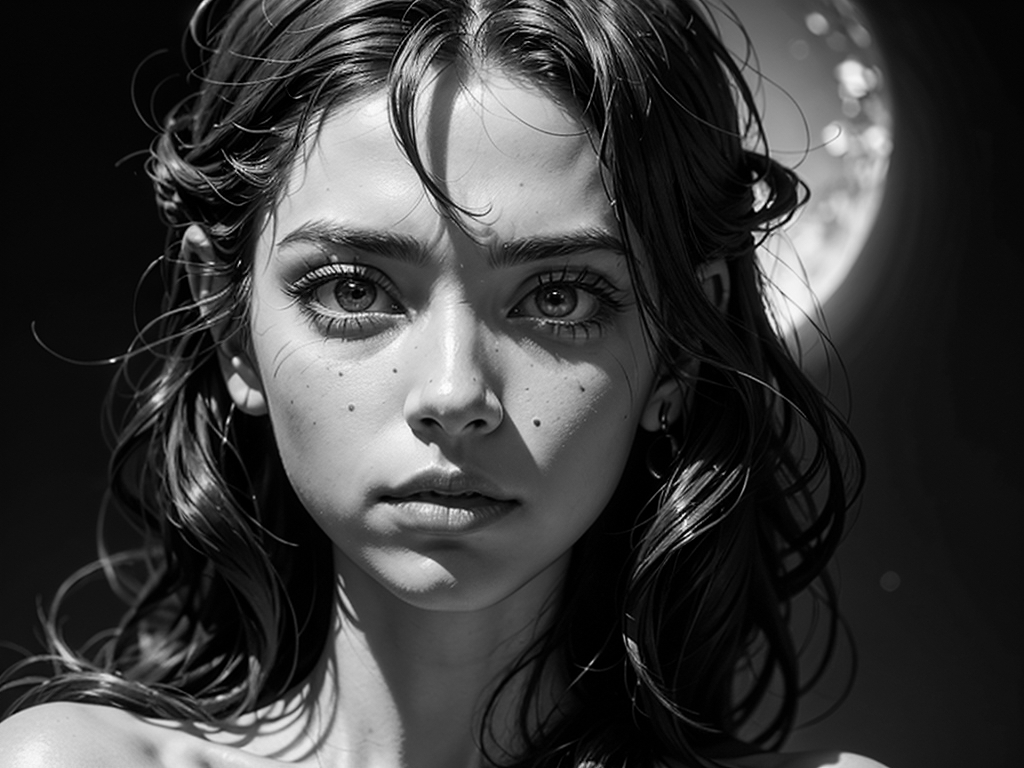

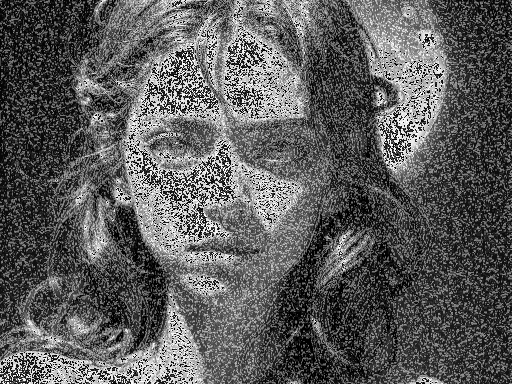

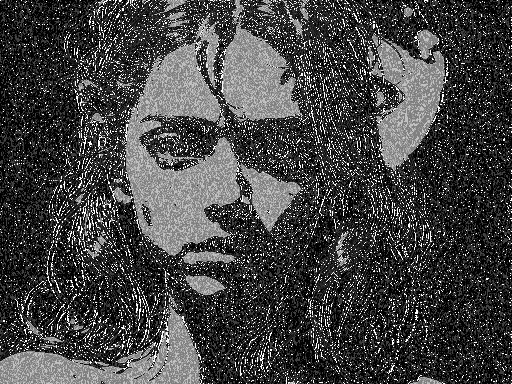

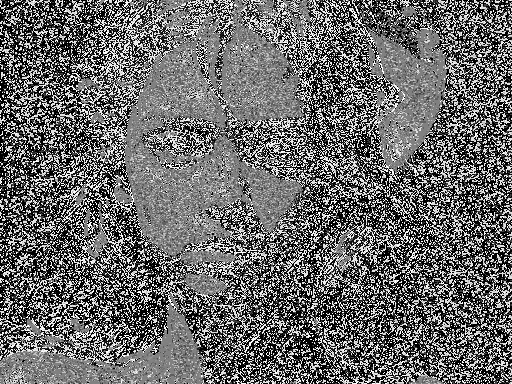

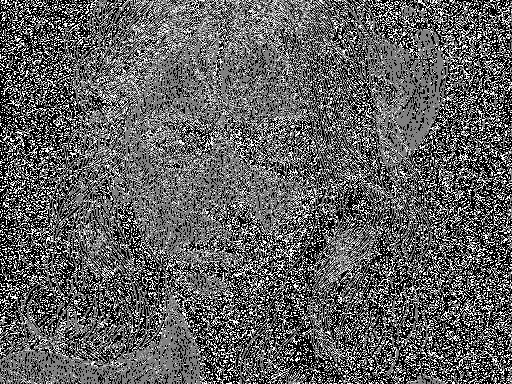

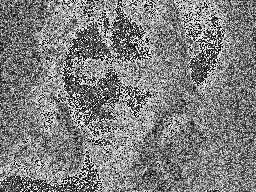

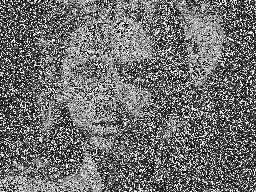

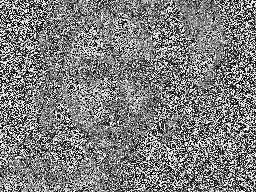

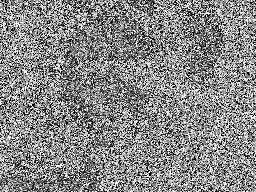

In [83]:
import cv2
import numpy as np

def dwt(seq):
    seq = np.copy(seq)
    n = seq.shape[0]

    detail_len = n >> 1
    approx_len = n - detail_len

    for i in range(1, detail_len):
        seq[(i << 1) - 1] -= (seq[(i - 1) << 1] + seq[i << 1]) >> 1
    seq[(detail_len << 1) - 1] -= (seq[(detail_len - 1) << 1] + seq[(approx_len - 1) << 1]) >> 1

    seq[0] += (seq[1] + seq[1] + 2) >> 2
    for i in range(1, approx_len - 1):
        seq[i << 1] += (seq[(i << 1) - 1] + seq[(i << 1) + 1] + 2) >> 2
    seq[(approx_len - 1) << 1] += (seq[(approx_len << 1) - 3] + seq[(detail_len << 1) - 1] + 2) >> 2

    return seq

def idwt(seq):
    seq = np.copy(seq)
    n = seq.shape[0]

    detail_len = n >> 1
    approx_len = n - detail_len
    
    seq[0] -= (seq[1] + seq[1] + 2) >> 2
    for i in range(1, approx_len - 1):
        seq[i << 1] -= (seq[(i << 1) - 1] + seq[(i << 1) + 1] + 2) >> 2
    seq[(approx_len - 1) << 1] -= (seq[(approx_len << 1) - 3] + seq[(detail_len << 1) - 1] + 2) >> 2

    for i in range(1, detail_len):
        seq[(i << 1) - 1] += (seq[(i - 1) << 1] + seq[i << 1]) >> 1
    seq[(detail_len << 1) - 1] += (seq[(detail_len - 1) << 1] + seq[(approx_len - 1) << 1]) >> 1

    return seq


def dwt2d(seq):
    
    horizontal_transform = np.apply_along_axis(dwt, axis=1, arr=seq)
    l = horizontal_transform[:,::2]
    h = horizontal_transform[:,1::2]
      
    vertical_transform_l = np.apply_along_axis(dwt, axis=0, arr=l)
    ll = np.array(vertical_transform_l[::2,:])
    lh = np.array(vertical_transform_l[1::2,:])
    
    vertical_transform_h = np.apply_along_axis(dwt, axis=0, arr=h)
    hl = np.array(vertical_transform_h[::2,:])    
    hh = np.array(vertical_transform_h[1::2,:])
    
    return ll, hl, lh, hh

def idwt2d(seq):
    None
    
def test():

    img = cv2.imread('data/images/girl_dress.jpg', cv2.IMREAD_GRAYSCALE)
    ll, hl, lh, hh = dwt2d(img)
    
    display(HTML('<h2>Input Image</h2>'))
    display(Image.fromarray(img))
    
    display(HTML('<h2>Output 2D DWT LVL 1</h2>'))
    display_images_in_grid(ll, hl, lh, hh)
    
    ll2, hl2, lh2, hh2 = dwt2d(ll)
    display(HTML('<h2>Output 2D DWT LVL 2</h2>'))
    display_images_in_grid(ll2, hl2, lh2, hh2)
    
test()